In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Resume.csv')

In [3]:
df.sample(5)

,Resume,Category
3790,Accounts Payable Specialist Accounts Payable S...,Project Manager
7832,Software Configuration Analyst Software Config...,Database Administrator
7701,Financial Analyst/HR Administrator Financial A...,Database Administrator
1436,MTS and Broker MTS and Broker MTS and Broker -...,Java Developer
2810,Front end/Angular Developer Front end/Angular ...,Frontend Developer


In [4]:
df.shape

(8350, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8350 entries, 0 to 8349
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    8350 non-null   object
 1   Category  8224 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [6]:
# renaming the cols
df.sample(5)

,Resume,Category
7833,Mongodb Admin/Oracle Database Admin Mongodb Ad...,Database Administrator
4166,Senior Project Manager Senior Project Manager ...,Project Manager
1531,Salesforce Developer Salesforce Developer Sale...,Java Developer
6084,ATTD Intern Engineer ATTD Intern Engineer ATTD...,Systems Administrator
1131,Junior Python Developer Junior Python Develope...,Python Developer


In [7]:
print(df['Category'].value_counts())

Python Developer          1275
Java Developer            1237
Web Developer              983
Database Administrator     920
Security Analyst           876
Systems Administrator      776
Project Manager            721
Frontend Developer         530
Network Administrator      469
Software Developer         437
Name: Category, dtype: int64


In [8]:
df['Category'] = df['Category'].replace({'Frontend Developer': 'Web Developer'})

In [9]:
print(df['Category'].value_counts())

Web Developer             1513
Python Developer          1275
Java Developer            1237
Database Administrator     920
Security Analyst           876
Systems Administrator      776
Project Manager            721
Network Administrator      469
Software Developer         437
Name: Category, dtype: int64


In [10]:
df.sample(5)

,Resume,Category
5862,Network/Systems Administrator over JSOC Networ...,Systems Administrator
3996,IT Project Manager IT Project Manager IT Proje...,Project Manager
2250,Associate Consultant Associate Consultant Asso...,Java Developer
2725,Manager/Senior Application Developer Manager/S...,Web Developer
3158,Network Administrator Network Administrator El...,Network Administrator


In [11]:
df['Resume'][100]

"Python developer Python developer Python developer - Texas Instruments, Texas New Jersey Wildlife and Game Refuge, NJ Authorized to work in the US for any employer Work Experience Python developer Texas Instruments, Texas November 2018 to Present Responsibilities:   Have work experience with various Python Integrated Development Environments like PyCharm, Eclipse, and Net Beans.  Involved in development of the enterprise social network application using Python, Twisted, and Cassandra.  Good understanding of Postgres, both database modeling and efficient querying and updates.  Experience in Python programming using Django and Postgres.  Solid in OOPS and Design Patterns and Linux based development.  Ability to troubleshoot the existing application and provide root cause analysis.  Designed and maintained databases using Python and developed Python-based API (RESTful Web Service) using Flask, SQL Alchemy, and Postgres SQL.  Designed and developed components using Python with Django fram

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['Category'])

In [14]:
df.sample(5)

,Resume,Category,target
6431,FULL STACK CLOUD ENGINEER - BOOTCAMP FULL STAC...,Web Developer,8
945,Senior ETL Oracle/ Python/Unix/Linux Developer...,Python Developer,4
6123,Systems Administrator Systems Administrator Sy...,Systems Administrator,7
2764,Front- End Developer Front-End Developer Front...,Web Developer,8
8063,Sr. SQL DBA (Consultant) Sr. SQL DBA (Consulta...,Database Administrator,0


In [15]:
df.isnull().sum()

Resume        0
Category    126
target        0
dtype: int64

In [16]:
# Remove rows with any null values
df_cleaned = df.dropna()

# Now, verify if null values have been removed
print(df_cleaned.isnull().sum())

Resume      0
Category    0
target      0
dtype: int64


In [17]:
df.duplicated().sum()

66

In [18]:
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(8284, 3)

In [21]:
df['Category'].value_counts()

Web Developer             1490
Python Developer          1275
Java Developer            1202
Database Administrator     920
Security Analyst           875
Systems Administrator      769
Project Manager            721
Network Administrator      469
Software Developer         437
Name: Category, dtype: int64

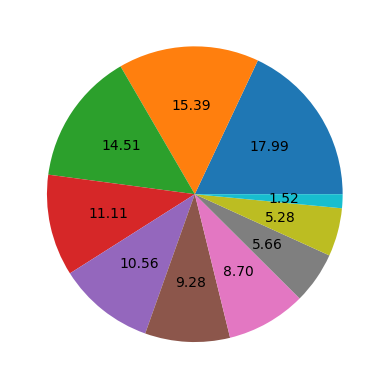

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), autopct="%0.2f")
plt.show()

In [23]:
import nltk
!pip3 install nltk
nltk.download('punkt')

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-brew-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-brew packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vishaltripathi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['Resume'].apply(len)

In [25]:
df.head()

,Resume,Category,target,num_characters
0,Python Developer Python Developer Philadelphia...,Python Developer,4,191
1,Python Developer Python Developer Python Devel...,Python Developer,4,3467
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,Python Developer,4,2812
3,Sr. Full Stack Developer Sr. Full Stack Develo...,Python Developer,4,16606
4,Sr. Full Stack Python Developer Sr. Full Stack...,Python Developer,4,9253


In [26]:
df['num_words'] = df['Resume'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Resume,Category,target,num_characters,num_words
0,Python Developer Python Developer Philadelphia...,Python Developer,4,191,28
1,Python Developer Python Developer Python Devel...,Python Developer,4,3467,612
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,Python Developer,4,2812,503
3,Sr. Full Stack Developer Sr. Full Stack Develo...,Python Developer,4,16606,2766
4,Sr. Full Stack Python Developer Sr. Full Stack...,Python Developer,4,9253,1595


In [28]:
df['num_sentences'] = df['Resume'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Resume,Category,target,num_characters,num_words,num_sentences
0,Python Developer Python Developer Philadelphia...,Python Developer,4,191,28,1
1,Python Developer Python Developer Python Devel...,Python Developer,4,3467,612,46
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,Python Developer,4,2812,503,34
3,Sr. Full Stack Developer Sr. Full Stack Develo...,Python Developer,4,16606,2766,128
4,Sr. Full Stack Python Developer Sr. Full Stack...,Python Developer,4,9253,1595,70


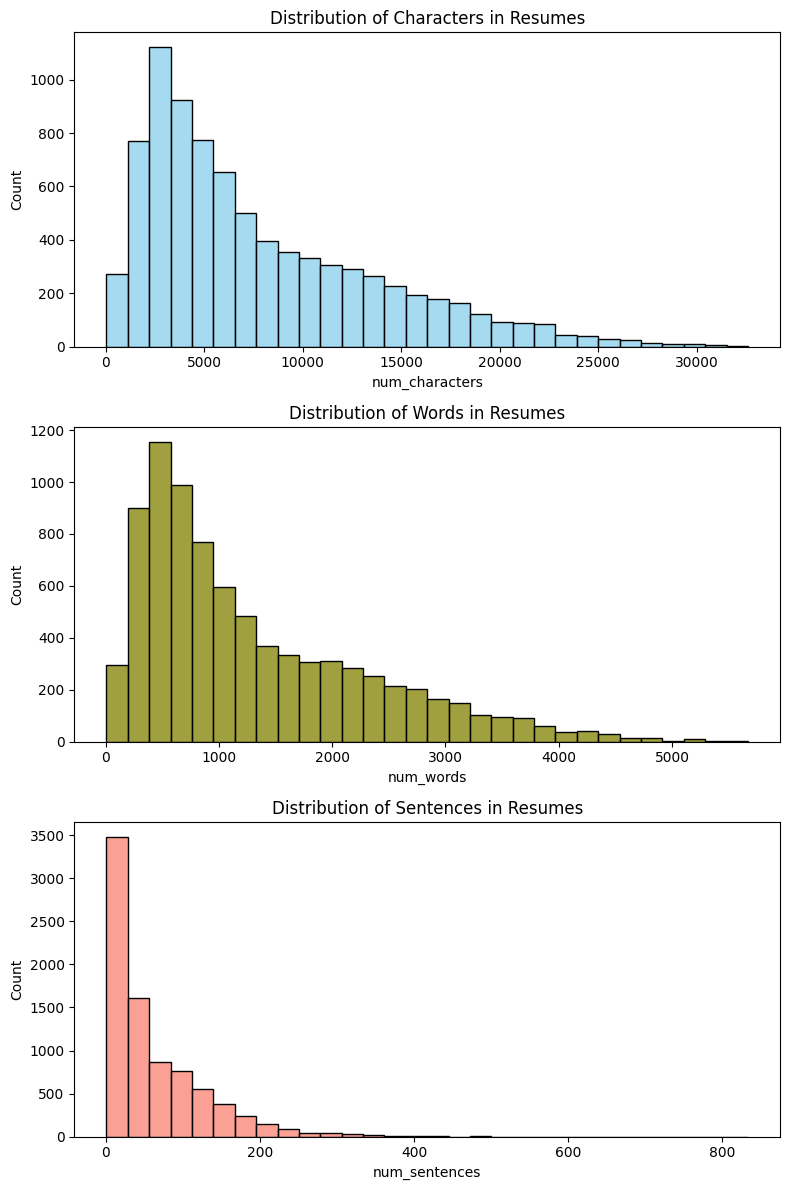

In [30]:
import seaborn as sns
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
sns.histplot(df['num_characters'], bins=30, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Characters in Resumes')
sns.histplot(df['num_words'], bins=30, ax=ax[1], color='olive')
ax[1].set_title('Distribution of Words in Resumes')
sns.histplot(df['num_sentences'], bins=30, ax=ax[2], color='salmon')
ax[2].set_title('Distribution of Sentences in Resumes')
plt.tight_layout()
plt.show()

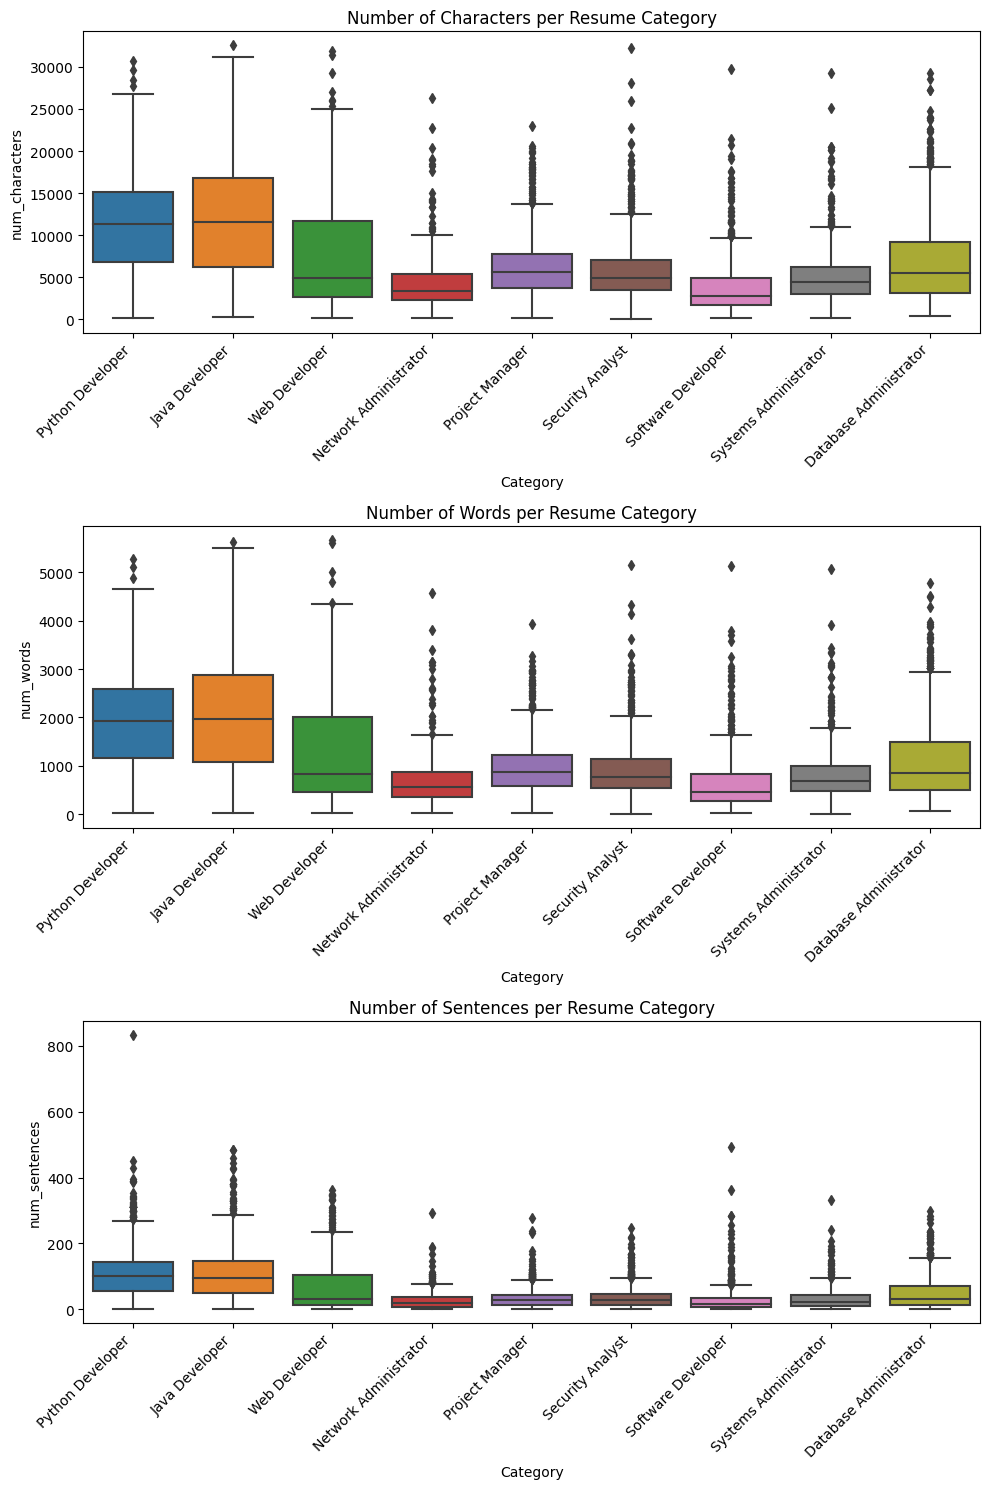

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.boxplot(x='Category', y='num_characters', data=df, ax=ax[0])
ax[0].set_title('Number of Characters per Resume Category')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
sns.boxplot(x='Category', y='num_words', data=df, ax=ax[1])
ax[1].set_title('Number of Words per Resume Category')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
sns.boxplot(x='Category', y='num_sentences', data=df, ax=ax[2])
ax[2].set_title('Number of Sentences per Resume Category')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

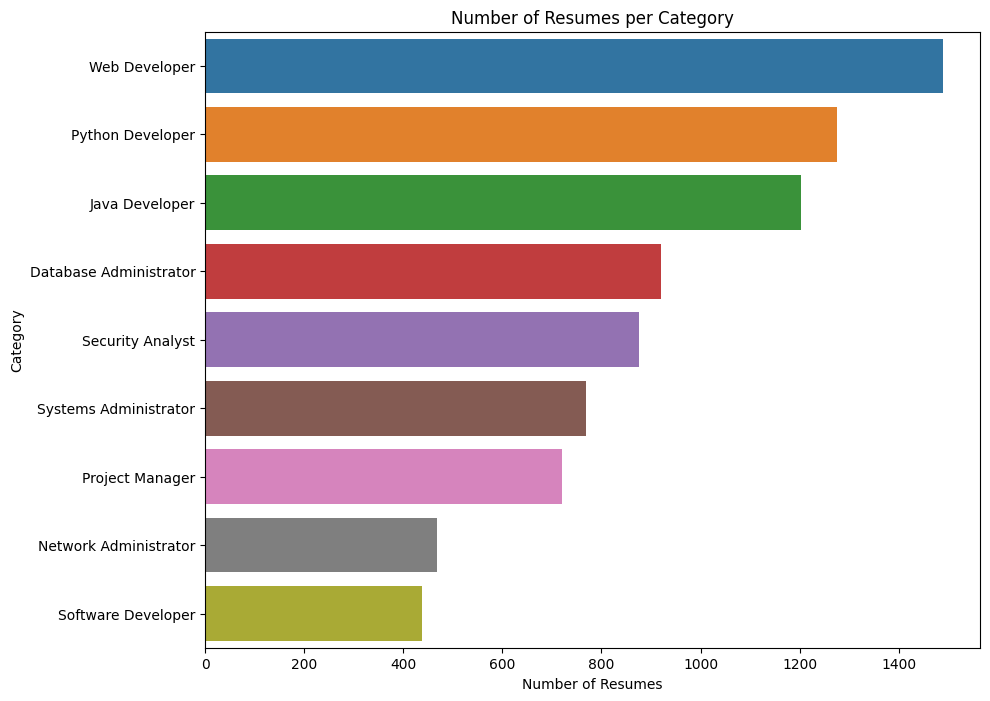

In [32]:
plt.figure(figsize=(10, 8))
sns.countplot(y='Category', data=df, order = df['Category'].value_counts().index)
plt.title('Number of Resumes per Category')
plt.xlabel('Number of Resumes')
plt.ylabel('Category')
plt.show()

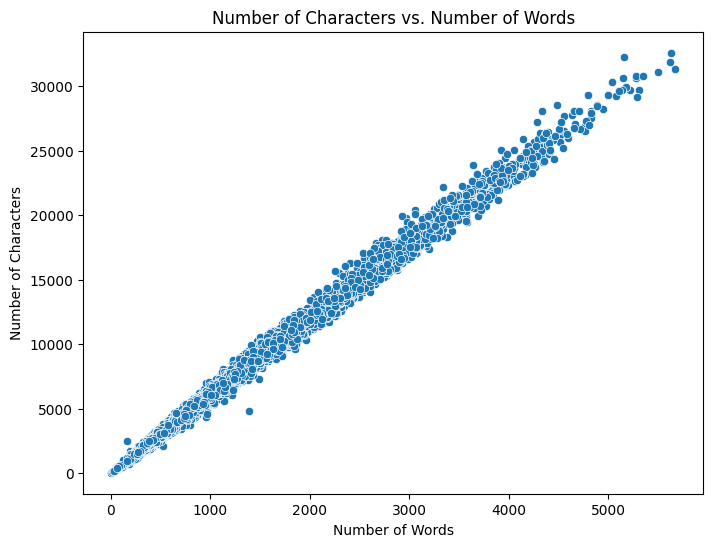

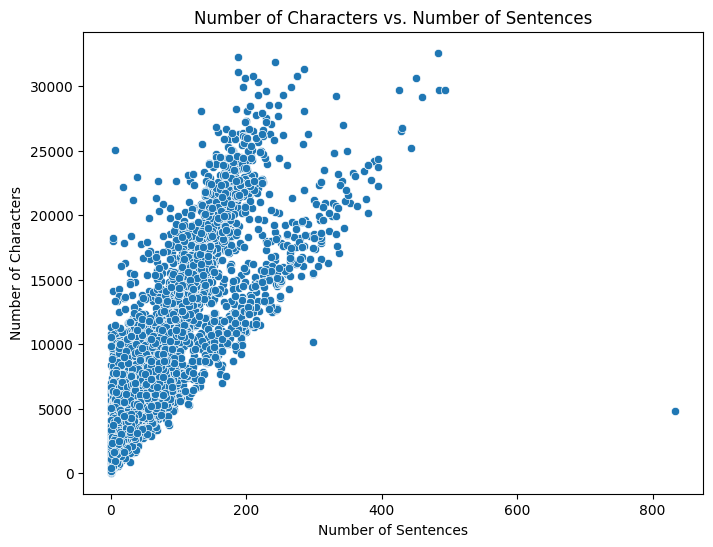

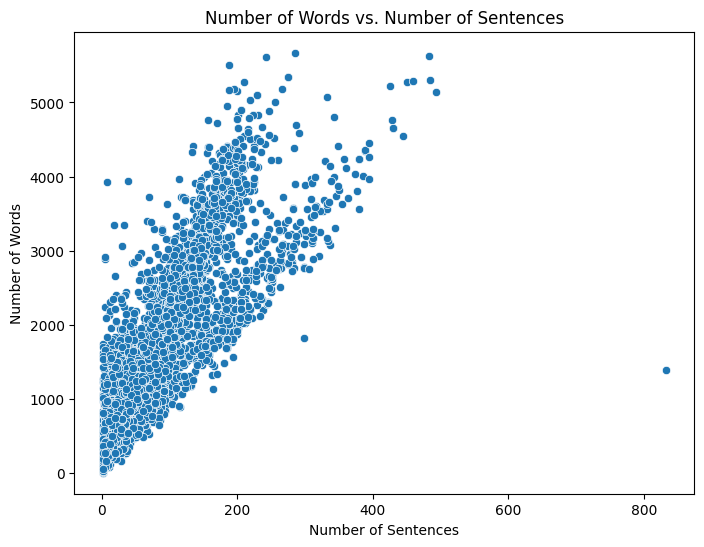

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for num_of_characters vs num_of_words
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_words', y='num_characters', data=df)
plt.title('Number of Characters vs. Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Number of Characters')
plt.show()

# Scatter plot for num_of_characters vs num_of_sentences
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_sentences', y='num_characters', data=df)
plt.title('Number of Characters vs. Number of Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Number of Characters')
plt.show()

# Scatter plot for num_of_words vs num_of_sentences
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_sentences', y='num_words', data=df)
plt.title('Number of Words vs. Number of Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Number of Words')
plt.show()


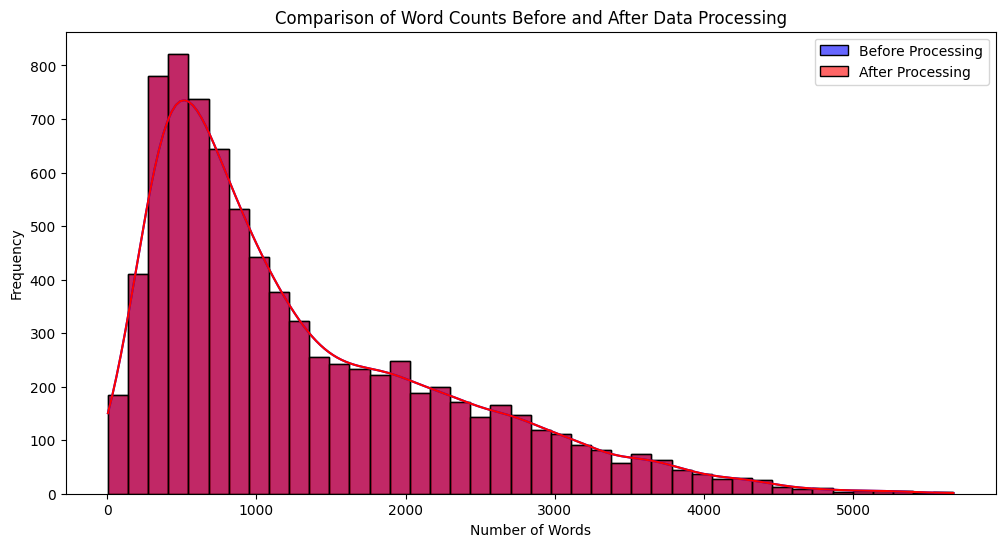

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df['num_words'], color='blue', alpha=0.6, label='Before Processing', kde=True)
sns.histplot(df['num_words'], color='red', alpha=0.6, label='After Processing', kde=True)
plt.title('Comparison of Word Counts Before and After Data Processing')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


/var/folders/qf/y_lw_4cn5vg9trhf76c4br400000gn/T/ipykernel_1351/2845009660.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['num_words'], shade=True, color="b", label="Before Processing")
/var/folders/qf/y_lw_4cn5vg9trhf76c4br400000gn/T/ipykernel_1351/2845009660.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['num_words'], shade=True, color="r", label="After Processing")


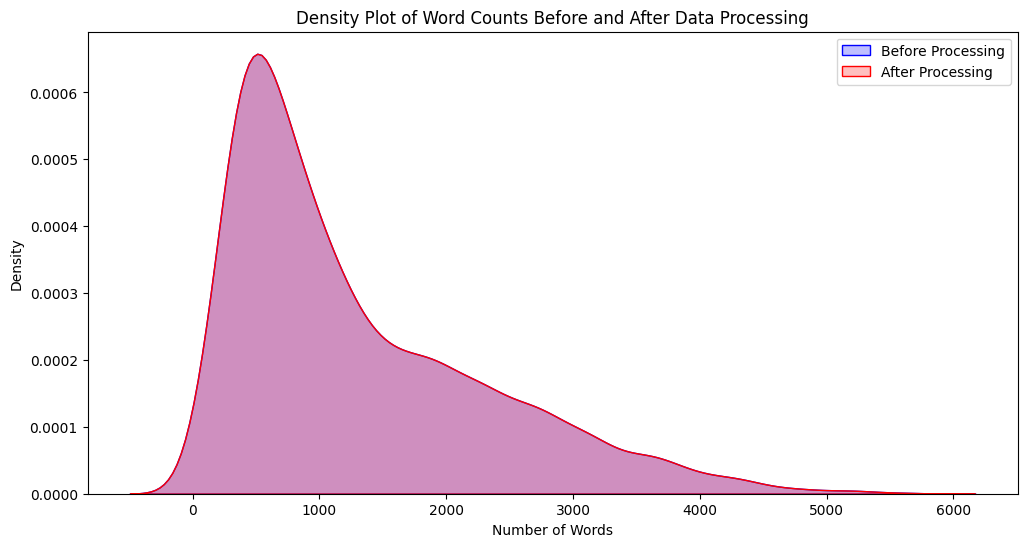

In [35]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['num_words'], shade=True, color="b", label="Before Processing")
sns.kdeplot(df['num_words_after'], shade=True, color="r", label="After Processing")
plt.title('Density Plot of Word Counts Before and After Data Processing')
plt.xlabel('Number of Words')
plt.legend()
plt.show()

In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8284.000000,8284.000000,8284.000000
mean,7830.294061,1305.596813,62.320739
std,5941.070790,1015.148166,65.565729
min,39.000000,6.000000,1.000000
25%,3201.250000,524.000000,15.000000
50%,5917.000000,957.000000,37.000000
75%,11319.250000,1902.000000,96.000000
max,32610.000000,5671.000000,833.000000


In [38]:
df[df['Category'] == 'Python Developer'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1275.000000,1275.000000,1275.000000
mean,11275.269804,1911.296471,107.785882
std,5948.675302,1015.886124,74.622359
min,191.000000,28.000000,1.000000
25%,6843.500000,1155.000000,56.000000
50%,11320.000000,1928.000000,100.000000
75%,15180.000000,2590.500000,142.000000
max,30680.000000,5275.000000,833.000000


In [39]:
df[df['Category'] == 'Java Developer'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1202.000000,1202.000000,1202.000000
mean,11918.053245,2041.136439,104.707155
std,7028.540558,1206.827883,76.529037
min,199.000000,31.000000,1.000000
25%,6191.000000,1073.000000,48.000000
50%,11549.000000,1973.000000,95.500000
75%,16745.500000,2880.000000,145.000000
max,32610.000000,5631.000000,485.000000


/var/folders/qf/y_lw_4cn5vg9trhf76c4br400000gn/T/ipykernel_1351/1950383679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

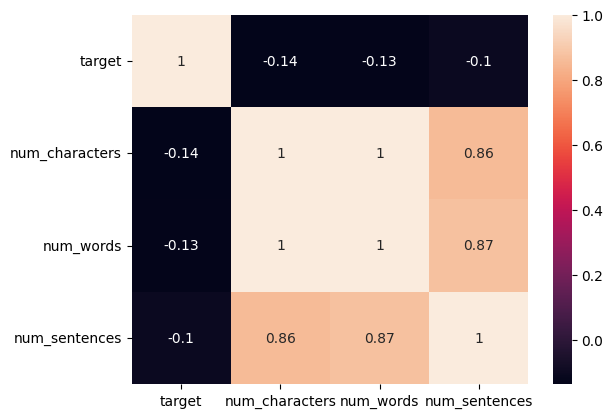

In [40]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishaltripathi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)


In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
df['transformed_text'] = df['Resume'].apply(transform_text)

In [49]:
df.head()

,Resume,Category,target,num_characters,num_words,num_sentences,transformed_text
0,Python Developer Python Developer Philadelphia...,Python Developer,4,191,28,1,python develop python develop philadelphia pa ...
1,Python Developer Python Developer Python Devel...,Python Developer,4,3467,612,46,python develop python develop python develop d...
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,Python Developer,4,2812,503,34,r engin r engin r engin nokia solut network so...
3,Sr. Full Stack Developer Sr. Full Stack Develo...,Python Developer,4,16606,2766,128,full stack develop full stack develop full sta...
4,Sr. Full Stack Python Developer Sr. Full Stack...,Python Developer,4,9253,1595,70,full stack python develop full stack python de...


In [50]:
df['num_sentences_after'] = df['Resume'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [51]:
df['num_characters_after'] = df['transformed_text'].apply(len)

In [52]:
df['num_words_after'] = df['transformed_text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [53]:
df.head()

,Resume,Category,target,num_characters,num_words,num_sentences,transformed_text,num_sentences_after,num_characters_after,num_words_after
0,Python Developer Python Developer Philadelphia...,Python Developer,4,191,28,1,python develop python develop philadelphia pa ...,1,158,23
1,Python Developer Python Developer Python Devel...,Python Developer,4,3467,612,46,python develop python develop python develop d...,46,2341,369
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,Python Developer,4,2812,503,34,r engin r engin r engin nokia solut network so...,34,1976,325
3,Sr. Full Stack Developer Sr. Full Stack Develo...,Python Developer,4,16606,2766,128,full stack develop full stack develop full sta...,128,11012,1702
4,Sr. Full Stack Python Developer Sr. Full Stack...,Python Developer,4,9253,1595,70,full stack python develop full stack python de...,70,6292,987


/var/folders/qf/y_lw_4cn5vg9trhf76c4br400000gn/T/ipykernel_1351/3062597304.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['num_words'], shade=True, color="b", label="Before Processing")
/var/folders/qf/y_lw_4cn5vg9trhf76c4br400000gn/T/ipykernel_1351/3062597304.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['num_words_after'], shade=True, color="r", label="After Processing")


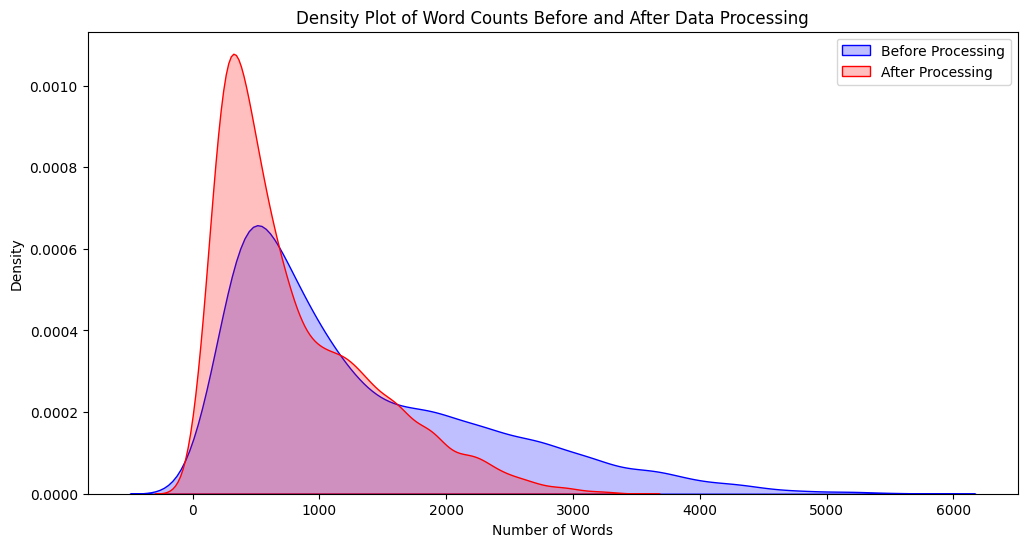

In [54]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['num_words'], shade=True, color="b", label="Before Processing")
sns.kdeplot(df['num_words_after'], shade=True, color="r", label="After Processing")
plt.title('Density Plot of Word Counts Before and After Data Processing')
plt.xlabel('Number of Words')
plt.legend()
plt.show()

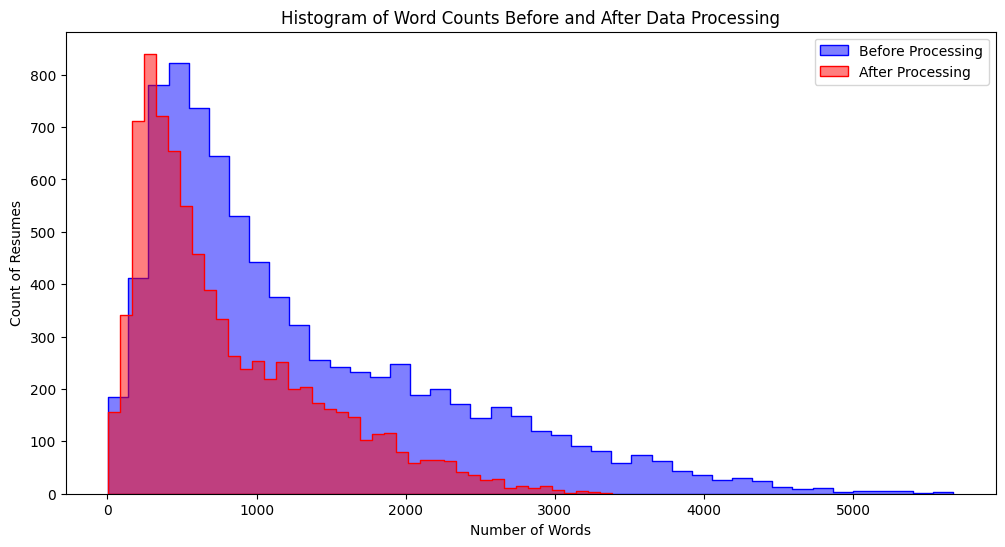

In [55]:
plt.figure(figsize=(12, 6))

# Plot histogram for 'num_words' before processing
sns.histplot(df['num_words'], color="blue", label="Before Processing", kde=False, stat="count", element="step", alpha=0.5)

# Plot histogram for 'num_words_after' after processing
sns.histplot(df['num_words_after'], color="red", label="After Processing", kde=False, stat="count", element="step", alpha=0.5)

plt.title('Histogram of Word Counts Before and After Data Processing')
plt.xlabel('Number of Words')
plt.ylabel('Count of Resumes')
plt.legend()
plt.show()

/var/folders/qf/y_lw_4cn5vg9trhf76c4br400000gn/T/ipykernel_1351/3948624195.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['num_words_after'], shade=True, color="r", label="After Processing")


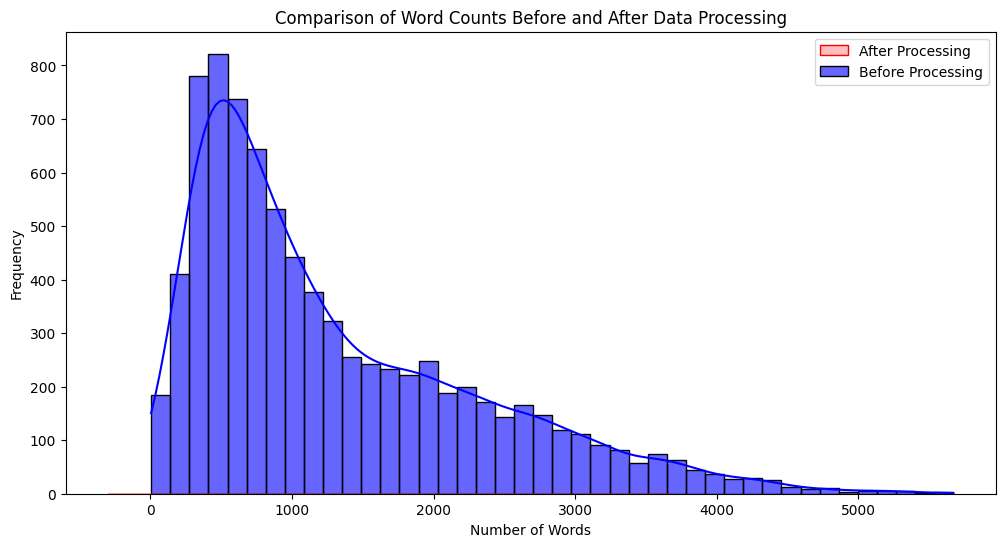

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(df['num_words'], color='blue', alpha=0.6, label='Before Processing', kde=True)
sns.kdeplot(df['num_words_after'], shade=True, color="r", label="After Processing")
# sns.histplot(df['num_words_after'], color='red', alpha=0.6, label='After Processing', kde=True)
plt.title('Comparison of Word Counts Before and After Data Processing')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

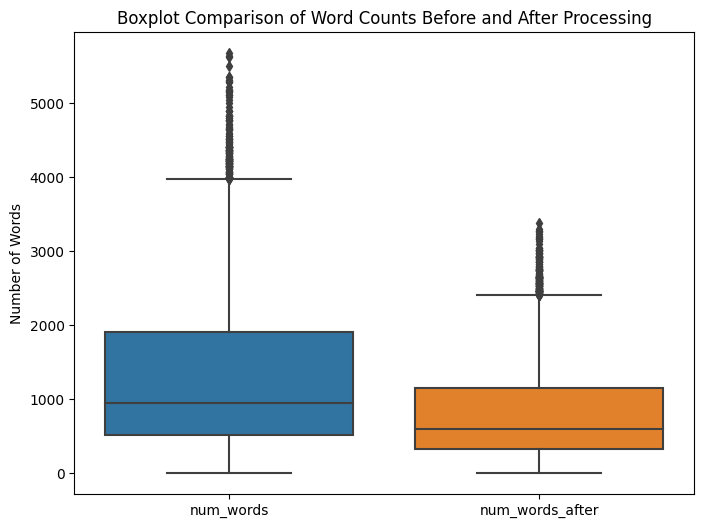

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['num_words', 'num_words_after']])
plt.title('Boxplot Comparison of Word Counts Before and After Processing')
plt.ylabel('Number of Words')
plt.show()

In [58]:
df[['num_characters_after','num_words_after','num_sentences_after']].describe()

,num_characters_after,num_words_after,num_sentences_after
count,8284.000000,8284.000000,8284.000000
mean,5208.053718,802.500845,62.320739
std,3932.455684,613.851225,65.565729
min,27.000000,4.000000,1.000000
25%,2148.750000,327.750000,15.000000
50%,3917.500000,597.000000,37.000000
75%,7519.000000,1159.000000,96.000000
max,21545.000000,3381.000000,833.000000


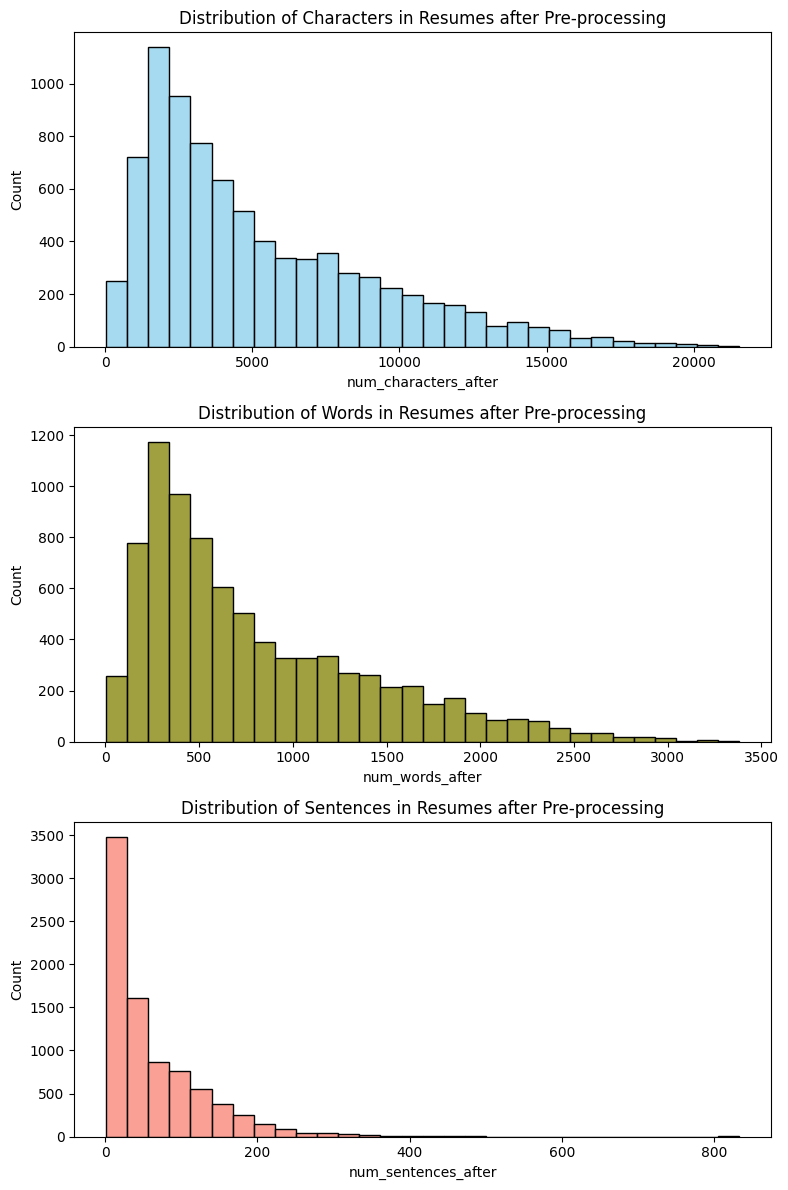

In [59]:
import seaborn as sns
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
sns.histplot(df['num_characters_after'], bins=30, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Characters in Resumes after Pre-processing')
sns.histplot(df['num_words_after'], bins=30, ax=ax[1], color='olive')
ax[1].set_title('Distribution of Words in Resumes after Pre-processing')
sns.histplot(df['num_sentences_after'], bins=30, ax=ax[2], color='salmon')
ax[2].set_title('Distribution of Sentences in Resumes after Pre-processing')
plt.tight_layout()
plt.show()

In [60]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [61]:
spam_wc = wc.generate(df['Resume'].str.cat(sep=" "))


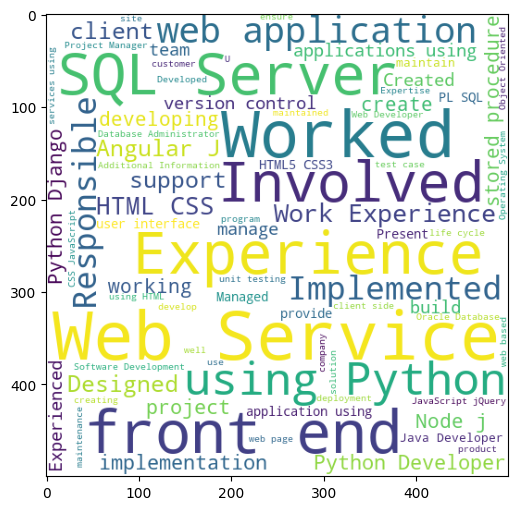

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [63]:
resume_corpus = []
for msg in df[df['Category'] == 'Java Developer']['Resume'].tolist():
    for word in msg.split():
        resume_corpus.append(word)

In [64]:
len(resume_corpus)

2038326

In [65]:
from collections import Counter
print(pd.DataFrame(Counter(resume_corpus).most_common(30)))

              0       1
0           and  107538
1           the   57615
2            to   47198
3            in   42535
4           for   35092
5         using   33111
6            of   29094
7          with   21361
8             ?   17505
9            on   17499
10       Spring   15214
11         Java   14105
12         Used   12206
13         data   12121
14    Developed   11233
15  application   10833
16           as    9824
17            a    9329
18          Web    9316
19         like    8177
20    Developer    7596
21          web    7570
22     Involved    7409
23   Experience    7170
24            -    7147
25       Worked    6857
26         from    6643
27  Implemented    5868
28  development    5858
29      various    5469


In [90]:
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [91]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [ ]:
def handle_inconsistency(text):
    if isinstance(text, str):
        # Remove non-alphanumeric characters and extra whitespaces
        text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
        # Remove URLs
        text = re.sub(r"http\S+", "", text)
        # Remove hashtags (words starting with #)
        text = re.sub(r"#\w+", "", text)
        # Remove mentions (words starting with @)
        text = re.sub(r"@\w+", "", text)
    
    return text
    
df['Resume']=df['Resume'].apply(lambda x: handle_inconsistency(x))

In [ ]:
def handle_inconsistency(text):
    if isinstance(text, str):
        # Remove extra whitespaces
        text = re.sub(r"\s+", " ", text)
        # Remove punctuation and special characters
        text = re.sub(r"[^\w\s]", "", text)
        text = re.sub(r"[\n\t\r]", "", text)
        text = re.sub(r"\n", "", text)
    return text

In [ ]:
def data_regularization(text):
    # text = text.lower()
    text = nltk.word_tokenize(text)

    y = []

    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

df['Resume']=df['Resume'].apply(lambda x: data_regularization(x))

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [71]:
X_resumes = tfidf.fit_transform(df['Resume']).toarray()

In [72]:
# Choose the row number to display (for example, row 1)
row_index = 1

# Get the TF-IDF vector for the chosen row
tfidf_vector = X_resumes[row_index]

# Create a DataFrame with words and their corresponding TF-IDF values
word_tfidf_df = pd.DataFrame(zip(tfidf.get_feature_names_out(), tfidf_vector), columns=['Word', 'TF-IDF'])

# Filter out words with TF-IDF values greater than 0
word_tfidf_df = word_tfidf_df[word_tfidf_df['TF-IDF'] > 0]

# Display the DataFrame
word_tfidf_df = pd.DataFrame(word_tfidf_df)
print(word_tfidf_df.head(20))

             Word    TF-IDF
1038         2013  0.016409
1056         2017  0.030917
1059         2018  0.033547
1065         2019  0.063635
4186    abilities  0.039483
4223        about  0.028102
4424  accordingly  0.042394
4613     acquired  0.043589
4865   additional  0.014757
5314   affiliates  0.058599
5320     affinity  0.068487
5996          all  0.039259
6203      alteryx  0.066939
6286       amazon  0.025104
6558     analysis  0.030161
6566      analyst  0.021579
6576      analyze  0.025301
6622          and  0.231809
7151          any  0.015253
7258          api  0.038333


In [73]:
# Create a DataFrame for better readability
df_DTM = pd.DataFrame(X_resumes, columns=tfidf.get_feature_names_out())

# print(df_DTM)
# Sum TF-IDF scores for each term
term_scores = df_DTM.iloc[:10, :].sum(axis=0)

# Sort terms by their summed TF-IDF scores
top_terms = term_scores.sort_values(ascending=False).head(10).index

# Select only the top 10 terms for the first 10 documents
df_top = df_DTM.loc[:9, top_terms]

print(df_top)

        and    python     using       the        to        in    django  \
0  0.000000  0.546400  0.000000  0.000000  0.060555  0.061135  0.000000   
1  0.231809  0.171987  0.049074  0.088785  0.181073  0.125079  0.000000   
2  0.246357  0.143045  0.054421  0.043760  0.063412  0.042680  0.000000   
3  0.488452  0.213310  0.263095  0.183134  0.125063  0.157057  0.139221   
4  0.448383  0.390026  0.189846  0.184236  0.157642  0.123215  0.130555   
5  0.474378  0.389398  0.162391  0.202737  0.156022  0.174273  0.208328   
6  0.442337  0.471238  0.134462  0.181485  0.149214  0.165708  0.212822   
7  0.413756  0.163204  0.113094  0.171176  0.191205  0.151299  0.000000   
8  0.476469  0.344443  0.243120  0.216286  0.128582  0.105474  0.183396   
9  0.348925  0.436006  0.256593  0.168810  0.120800  0.164643  0.223986   

        for       aws        of  
0  0.000000  0.000000  0.000000  
1  0.058798  0.087746  0.097407  
2  0.032602  0.000000  0.086417  
3  0.125463  0.077233  0.093531  
4  0

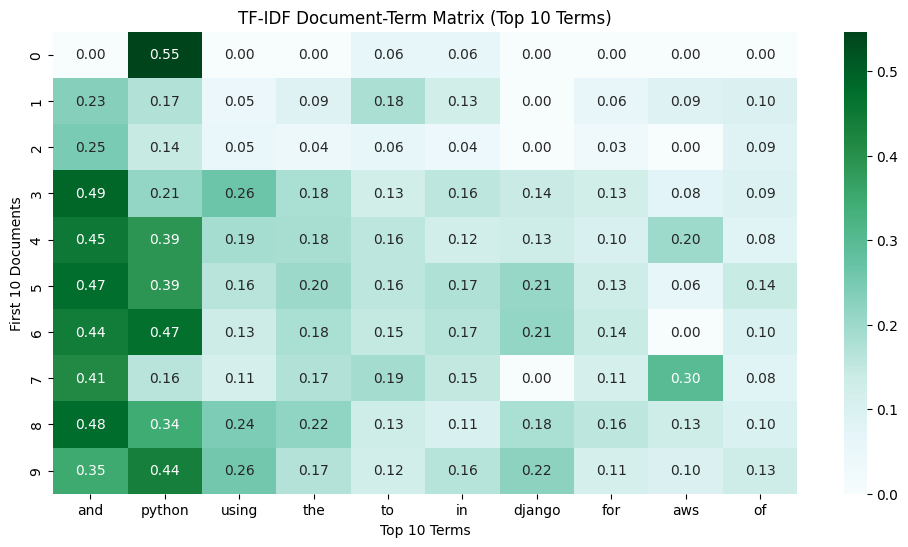

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Using Seaborn to create the heatmap
sns.heatmap(df_top, annot=True, fmt=".2f", cmap="BuGn")

plt.title('TF-IDF Document-Term Matrix (Top 10 Terms)')
plt.xlabel('Top 10 Terms')
plt.ylabel('First 10 Documents')

plt.show()

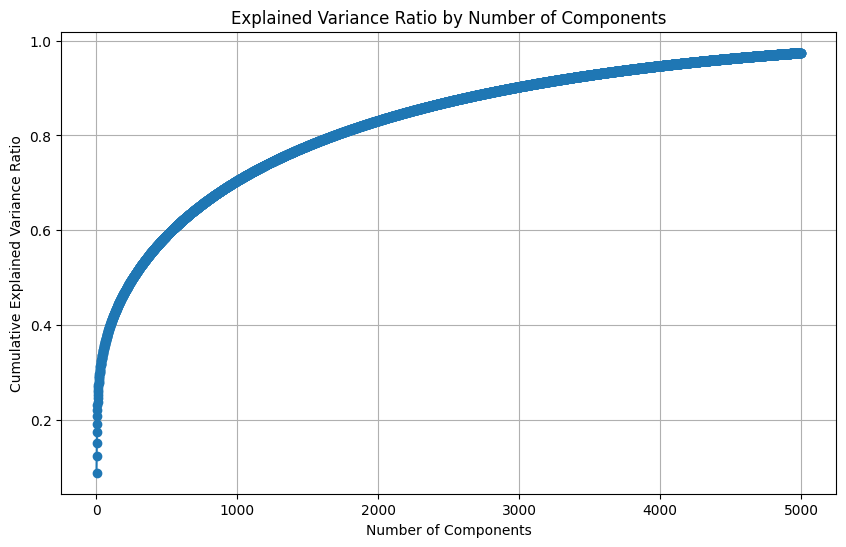

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instantiate PCA
pca = PCA(n_components=3000, svd_solver='arpack')

# Fit PCA to the TF-IDF matrix
tfidf_pca = pca.fit_transform(X_resumes)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

In [78]:
import pickle
# Path to the pickle file
pickle_file_path = 'tfidf_pca_3000.pkl'

# Load the PCA model from a pickle file
with open(pickle_file_path, 'rb') as file:
    pca_components = pickle.load(file)

# Access the PCA components
print("PCA Components:\n", pca_components)
# print("PCA Components:\n", pca_components)


PCA Components:
 [[ 7.55393259e-02  3.18037299e-01 -2.38134913e-01 ... -1.18246718e-04
  -1.71145909e-03  2.08162533e-03]
 [-3.80063595e-03  1.53428693e-01 -5.83600706e-02 ...  1.69914963e-03
  -1.72979041e-03 -1.40116752e-04]
 [ 3.58841249e-02  7.45182773e-02 -3.22071173e-02 ...  8.18234841e-05
  -1.85521286e-03  2.76349412e-03]
 ...
 [-1.42575900e-01  2.99088625e-02 -1.06398880e-01 ...  3.61721183e-04
   5.04825623e-04 -5.56950746e-04]
 [ 4.57676498e-01  3.58469511e-01 -1.93241571e-01 ...  2.92880653e-03
   8.38559410e-04  8.13696183e-04]
 [ 5.81285396e-01  2.25294942e-01 -8.64118044e-02 ... -6.78504528e-04
  -1.02567362e-04  5.19785220e-03]]


In [168]:
# Example to analyze the first principal component
first_component = pca_components[100]

# Pair each feature with its weight in the first component
word_importance = zip(feature_names, first_component)

# Sort features by the absolute value of their weights
sorted_words = sorted(word_importance, key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 influential words in the first principal component
print("Top 10 influential words in the first principal component:")
# for word, weight in sorted_words[:100]:
    # print(f"{word}: {weight}")

Top 10 influential words in the first principal component:


In [78]:
# Splitting the data into train (80%) and rest (20%)
from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% temporary test set
X_train, X_temp, y_train, y_temp = train_test_split(X_resumes, df['Category'], test_size=0.2, random_state=42)

# Splitting the temporary test set into 50% test and 50% validation, which will each be 10% of the total data
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have:
# X_train, y_train - 80% training data
# X_test, y_test - 10% test data
# X_val, y_val - 10% validation data


# Printing the sizes of each set
print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 6627
Validation set size: 829
Test set size: 828


In [80]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [82]:
svc = SVC(kernel='linear', gamma=1.0)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [83]:
clfs = {
    'SVC' : svc,
    'NB': mnb,
    'RF': rfc
}

In [88]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Convert arrays to DataFrames
    X_train_df = pd.DataFrame(X_train)
    y_train_df = pd.DataFrame(y_train)
    X_test_df = pd.DataFrame(X_test)
    y_test_df = pd.DataFrame(y_test)
    
    # Concatenate X and y for training and testing data
    train_data = pd.concat([X_train_df, y_train_df], axis=1)
    test_data = pd.concat([X_test_df, y_test_df], axis=1)
    
    # Drop all rows with NaN values from training and testing data
    train_data = train_data.dropna()
    test_data = test_data.dropna()
    
    # Separate the features and the target variable after cleaning
    X_train_clean = train_data.iloc[:, :-1].values
    y_train_clean = train_data.iloc[:, -1].values
    X_test_clean = test_data.iloc[:, :-1].values
    y_test_clean = test_data.iloc[:, -1].values
    
    # Fit the classifier on the cleaned training data
    clf.fit(X_train_clean, y_train_clean)
    y_pred = clf.predict(X_test_clean)
    accuracy = accuracy_score(y_test_clean, y_pred)

    return accuracy

In [ ]:
accuracy_scores = []
# precision_scores = []

for name,clf in clfs.items():

    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    # print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    # precision_scores.append(current_precision)